### Random Forest, Gradient boosting

- ensemble : 결과를 위해 여러 모델을 함께 쓰는 것
- noise, variance, bias 등으로 결과가 달라짐 > 영향을 줄이기 위해서 ensemble 사용


> bagging = random forest model
>- 여러 boostrap 자료를 합쳐서 사용
>- random sampling / 
>- heigh variance 감소 ,  과대적합 모형에 적합

> boosting = Gradient boosting
>- 앞 단계를 개선해서 다음 단계 모델을 생성함 > 순차적으로 실수를 줄여감
>- 과적합 방지를 위한 중지 기준을 정해야 함 >> 모델 반복 생성이니까

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False  

### Random Forest
- 여러 결정 트리를 결합
- 트리 결과를 평균하거나 vote하여 과대적합을 줄인다.


- classification - 예측 확률의 평균
- Regression - 예측 값들의 평균


- 데이터 포인터나 특성에 무작위성 ... 

- 트리수 결정 = n_estimators
- max_depth=None ... none은 순수 리프노드까지 or min sample 조건에 맞을때까지
- min_samples_split  가지치기 할 때 두 개까지..


- n-sample >> 트리의 개수,  m-features >> 특성의 개수
- max_feature 설정 가능. 클수록 트리가 커지고 비슷해짐/ 작을수록 달라지고 깊어짐
- max_features

> Regression
>- max_features=n_features: 'auto', 'sqrt', ...
>- 예측들을 평균내서 최종으로 사용

> Classification
>- max_features=sqrt(n_features) : 'auto', 'sqrt', 'log2', 'None'..
>- 예측한 확률 평균내서 가장 높은 확률을 가진 클래스


### make moons

In [2]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

#moons데이터 불러오기

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#cross_val_score
#cross validation으로 n조각으로 나눠서 점수를 내는...
#교차 검증!
#fold로 분할해서 테스트 | 훈련 데이터로 사용함!
#default  cv = 3

forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)
# 랜덤 포레스트 모델 생성. 트리 수는 5개.

print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
cvs = cross_val_score(forest, X, y,cv=5)
print("테스트 세트 정확도: CV = 5 {:.3f}".format(cvs.min()))
cvs = cross_val_score(forest, X, y,cv=10)
print("테스트 세트 정확도: CV = 10 {:.3f}\n\n".format(cvs.min()))


## 결정트리 분류기로 실험
tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0).fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))
cvs = cross_val_score(tree, X, y,cv=5)
print("테스트 세트 정확도: CV = 5 {:.3f}".format(cvs.min()))
cvs = cross_val_score(tree, X, y,cv=10)
print("테스트 세트 정확도: CV = 10 {:.3f}".format(cvs.min()))

#random forest 결과가 좀 더 좋음..


테스트 세트 정확도: 0.920
테스트 세트 정확도: CV = 5 0.750
테스트 세트 정확도: CV = 10 0.600


테스트 세트 정확도: 0.880
테스트 세트 정확도: CV = 5 0.700
테스트 세트 정확도: CV = 10 0.400


- 예제에 나온 것과 달리 테스트 세트 정확도가 심하게 떨어짐..
- random forest가 더 좋음
- cv횟수가 늘어날수록 성능이 떨어짐

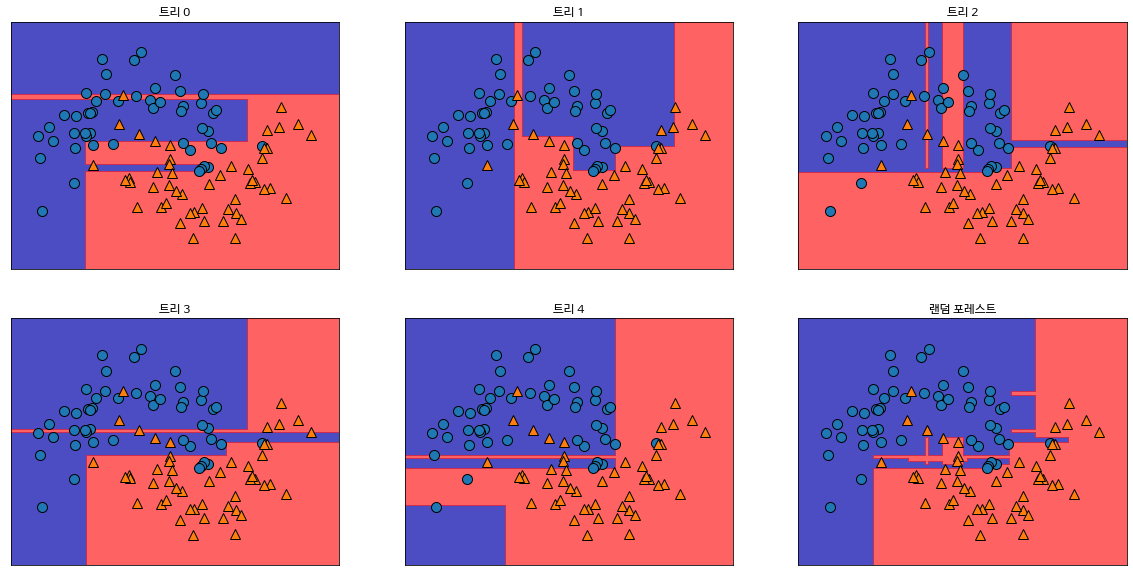

In [4]:

fig, axes = plt.subplots(2,3, figsize=(20,10))

for i, ax, es in zip(range(6), axes.ravel(), forest.estimators_):
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    mglearn.plots.plot_2d_separator(es, X, fill=True, alpha=.7, ax = ax)
    ax.set_title("트리 {}".format(i))
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[1][2], alpha=.7)
axes[1][2].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[1][2])

#axes.ravel()   ravel은 다차원배열을 일차원 배열로 늘여주는 함수다

- n_estimators = 5로 설정하여 각각 생성한 트리들이 forest.estimators_에 들어있음

- 그 각각의 다섯 트리와 합쳐진 랜덤 포레스트 트리


- 부트스트랩 샘플링이라서 훈련포인트가 동일하지 않음.

In [77]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data
                                                    ,cancer.target, 
                                                    random_state=42, stratify=cancer.target)
forest_cancer = RandomForestClassifier(n_estimators=100, random_state=0)
forest_cancer.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest_cancer.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest_cancer.score(X_test, y_test)))

cvs = cross_val_score(forest_cancer, cancer.data, cancer.target,cv=10)
print("테스트 세트 정확도: CV = 10 {:.3f}".format(cvs.min()))

print(cvs)


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958
테스트 세트 정확도: CV = 10 0.895
[0.98245614 0.89473684 0.94736842 0.96491228 1.         0.98245614
 0.94736842 0.98245614 0.94736842 1.        ]


#### cancer데이터에 대한 랜덤포레스트분류 점수

실전에 쓸만한가?

- 어떤 쪽 에러를 더 중요하게 생각하는가에 따라...

In [78]:
# cancer-model의 중요도 함수
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    plt.xlim(0,1)
    plt.grid()

랜덤포레스트 가장 중요한 특성 :  ['worst perimeter']
결정 트리 가장 중요한 특성 :  ['worst radius']
랜덤 포레스트 중요도가 0인 특성의 갯수 :  0
결정 트리 중요도가 0인 특성의 갯수 :  16


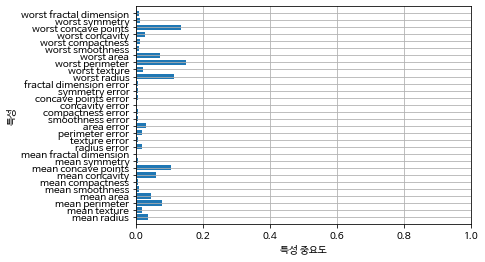

In [83]:
plot_feature_importances_cancer(forest_cancer)

tree = DecisionTreeClassifier(max_depth=8, random_state=0).fit(X_train, y_train)

most = np.where(forest_cancer.feature_importances_.max() == forest_cancer.feature_importances_)
print("랜덤포레스트 가장 중요한 특성 : ", cancer.feature_names[most])

most = np.where(tree.feature_importances_.max() == tree.feature_importances_)
print("결정 트리 가장 중요한 특성 : ", cancer.feature_names[most])
#특성의 중요도!



print("랜덤 포레스트 중요도가 0인 특성의 갯수 : ", (forest_cancer.feature_importances_==0).sum())
print("결정 트리 중요도가 0인 특성의 갯수 : ", (tree.feature_importances_==0).sum())


- 결정트리와 특성 중요도가 다르게 나옴      ==> test split 난수를 0으로 두면 둘 다 perimeter가 제일 높음 . 지금은 42
- 결정트리는 한 트리만 보고 결과를 내고
- 랜덤 포레스트는 생성한 모든 트리의 특성 중요도를 취합한 결과


- 결정트리보다 중요도 0이 아닌 특성이 늘어남
- 결정트리는 18개의 중요도 0 특성이 있는 반면 랜덤 포레스트 트리는 하나도 없다.

In [8]:
tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
tree.fit(X_train, y_train)

print("랜덤 포레스트")
print("훈련 세트 정확도: {:.3f}".format(forest_cancer.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest_cancer.score(X_test, y_test)))
cvs = cross_val_score(forest_cancer, cancer.data, cancer.target,cv=10)
print("테스트 세트 정확도: CV = 10 {:.3f}".format(cvs.min()))

print("\n결정트리")
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

cvs = cross_val_score(tree, cancer.data, cancer.target,cv=10)
print("테스트 세트 정확도: CV = 10 {:.3f}".format(cvs.min()))

#print(cvs)


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=3000).fit(X_train, y_train)
print("\n로지스틱회귀")
print("훈련 세트 정확도: {:.3f}".format(lr.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(lr.score(X_test, y_test)))

cvs = cross_val_score(lr, cancer.data, cancer.target,cv=10)
print("테스트 세트 정확도: CV = 10 {:.3f}".format(cvs.min()))

#print(cvs)
                                                                                       
#                                                                              

랜덤 포레스트
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958
테스트 세트 정확도: CV = 10 0.895

결정트리
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937
테스트 세트 정확도: CV = 10 0.842

로지스틱회귀
훈련 세트 정확도: 0.958
테스트 세트 정확도: 0.958
테스트 세트 정확도: CV = 10 0.912


#### cancer 데이터 - 모델들 적용

- 결정트리, 랜덤 포레스트는 과적합된 결과.
- cv=10 으로 여러번 나뉘어 테스트 될 때 로지스틱이 가장 성능이 좋았다
- 그리고 로지스틱이 제일 연산이 느린 것 같음. cv + iteration 으로 연산이 많아지는 것인가..?

### iris Data

In [47]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

#iris data 로드

In [32]:
# iris 데이터에 대해.. 모델을 주면 그에 따른 특성 중요도를 보여주는 함수
def plot_feature_importances_iris(model):
    n_features = iris.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names) # y축
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(0, n_features)
    plt.xlim(0,1)
    plt.grid()

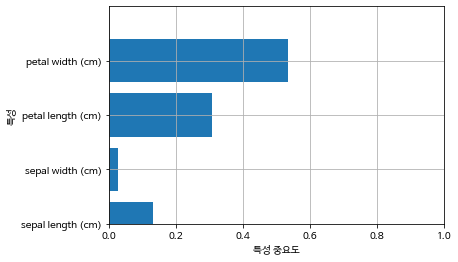

In [92]:

rf = RandomForestClassifier(n_estimators=9, random_state=0).fit(X,y)
plot_feature_importances_iris(rf)


### iris data - random forest 중요도

- 결정 트리와 다르게 sepal width 중요도가 0이 아님!
- 암 데이터와 같이 중요도 0이 아닌 데이터가 많아짐.
- random state..난수 설정 안해주면 매번 결과 달라짐...


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=0)


rf = RandomForestClassifier(n_estimators=9, random_state=0).fit(X_train,y_train)

print("랜덤 포레스트")
print("훈련 세트 정확도: {:.3f}".format(rf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rf.score(X_test, y_test)))
cvs = cross_val_score(rf, X, y,cv=10)
print("테스트 세트 정확도: CV = 10 {:.3f}".format(cvs.min()))

tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0).fit(X_train, y_train)

print("\n결정트리")
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

cvs = cross_val_score(tree, X,y,cv=10)
print("테스트 세트 정확도: CV = 10 {:.3f}".format(cvs.min()))

#print(cvs)

lr = LogisticRegression(max_iter=3000).fit(X_train, y_train)
print("\n로지스틱회귀")
print("훈련 세트 정확도: {:.3f}".format(lr.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(lr.score(X_test, y_test)))

cvs = cross_val_score(lr, X,y,cv=10)
print("테스트 세트 정확도: CV = 10 {:.3f}".format(cvs.min()))

#print(cvs)
                                                                                       
#                                                                              

랜덤 포레스트
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.974
테스트 세트 정확도: CV = 10 0.933

결정트리
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.974
테스트 세트 정확도: CV = 10 0.867

로지스틱회귀
훈련 세트 정확도: 0.982
테스트 세트 정확도: 0.974
테스트 세트 정확도: CV = 10 0.933


- 역시 결정트리랑 랜덤 포레스트는 과적합... 
- cv 10에선 로지스틱. 랜덤포레스트가 성능이 좋게 나옴

### make blobs

In [99]:
from sklearn.datasets import make_blobs

X,y = make_blobs( random_state=0)
print(X.shape, ' ', y.shape)

print(np.bincount(y))
#클래스 3개 / 특성 2개

(100, 2)   (100,)
[34 33 33]


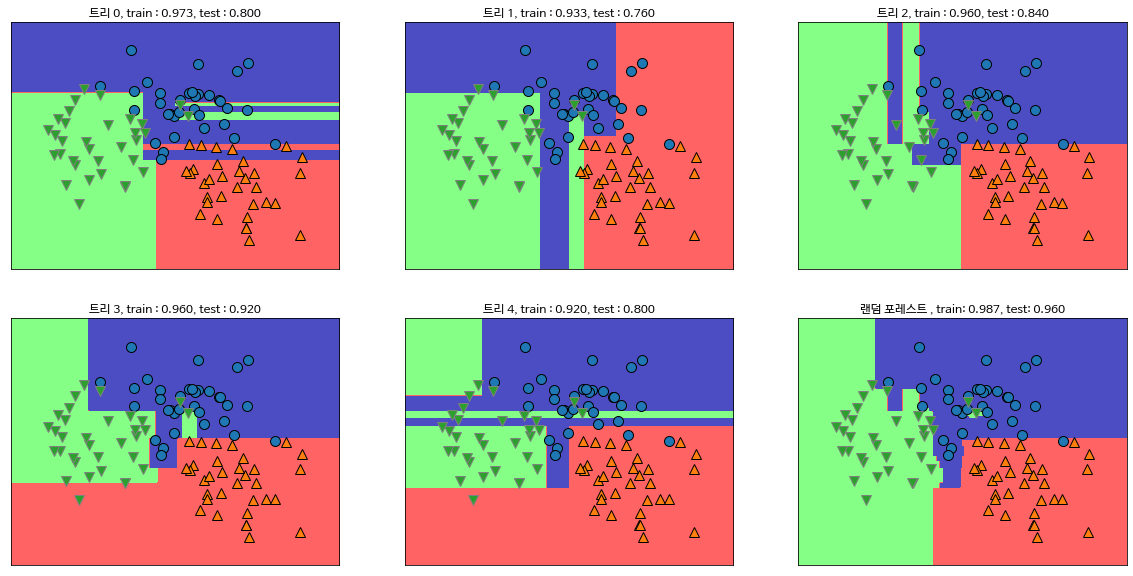

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=0)

rf = RandomForestClassifier(random_state=2, n_estimators=5).fit(X_train,y_train)

fig, axes = plt.subplots(2,3, figsize=(20,10))

for i, ax, es in zip(range(6), axes.ravel(), rf.estimators_):
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    mglearn.plots.plot_2d_classification(es, X, fill=True, alpha=.7, ax = ax)
    ax.set_title("트리 {}, train : {:.3f}, test : {:.3f}".format(i, es.score(X_train,y_train), es.score(X_test, y_test)))
    
mglearn.plots.plot_2d_classification(rf, X, fill=True, ax=axes[1][2], alpha=.7)
axes[1][2].set_title("랜덤 포레스트 , train: {:.3f}, test: {:.3f}".format(rf.score(X_train,y_train), rf.score(X_test, y_test)))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[-1][-1])


랜덤 포레스트가 취합 결과라서 성능이 좋음

### Extended Boston - 회귀

In [117]:
from sklearn.ensemble import RandomForestRegressor
from mglearn.datasets import load_extended_boston

X, y = load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=0)

rf = RandomForestRegressor().fit(X_train,y_train)


In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

decreg = DecisionTreeRegressor().fit(X_train, y_train) #결정트리회귀
lr = LinearRegression().fit(X_train, y_train) #선형회귀
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train) # k이웃회귀
ridge = Ridge(alpha=0.01,max_iter=3000).fit(X_train, y_train)
lasso = Lasso(alpha=0.01,max_iter=3000).fit(X_train, y_train)

print("Train")
print("RandomForest : {:.3f}".format(rf.score(X_train,y_train)))
print("decisionTree : {:.3f}".format(decreg.score(X_train,y_train)))
print("linear : {:.3f}".format(lr.score(X_train,y_train)))
print("knn : {:.3f}".format(lasso.score(X_train,y_train)))
print("ridge : {:.3f}".format(ridge.score(X_train,y_train)))
print("Lasso : {:.3f}".format(lasso.score(X_train,y_train)))


print("\nTEST")
print("RandomForest : {:.3f}".format(rf.score(X_test,y_test)))
print("decisionTree : {:.3f}".format(decreg.score(X_test,y_test)))
print("linear : {:.3f}".format(lr.score(X_test,y_test)))
print("knn : {:.3f}".format(lasso.score(X_test,y_test)))
print("ridge : {:.3f}".format(ridge.score(X_test,y_test)))
print("Lasso : {:.3f}".format(lasso.score(X_test,y_test)))



Train
RandomForest : 0.985
decisionTree : 1.000
linear : 0.952
knn : 0.896
ridge : 0.944
Lasso : 0.896

TEST
RandomForest : 0.754
decisionTree : 0.657
linear : 0.607
knn : 0.766
ridge : 0.702
Lasso : 0.766


확장된 보스턴 데이터로.....

- train데이터에 대해서 랜덤 포레스트와 결정트리는 과적합된 결과를 보여줌
- 테스트 데이터에 대해선 랜덤 포레스트 > 결정 트리
- 위 파라미터 상태에선 knn.Lasso가 가장 좋은 결과가 나왔음

### ram price

Text(0, 0.5, '가격 ($/Mbyte)')

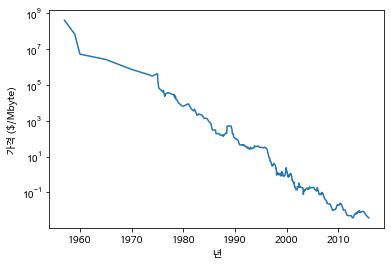

In [149]:
import os
ram_prices= pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv")) 

plt.yticks(fontname='Arial') #설정 안해주면 -심볼 관련 오류남
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

### 회귀 모델들

random forest train : 1.00, test : -4.58
decision tree train : 1.00, test : -5.23
knn forest train : 0.99, test : -3.57
linear forest train : 0.96, test : 0.83
ridge forest train : 0.96, test : 0.83
lasso forest train : 0.96, test : 0.83
[-0.42880156]   858.0181558459274
[-0.428798]   858.0110626171821
[-0.42712231]   854.6766472375066


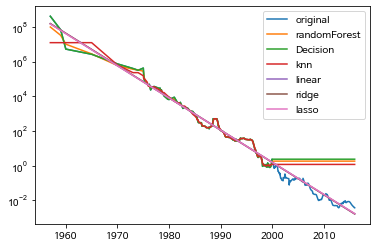

In [146]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = np.array(data_train.date).reshape(-1,1)
y_train = np.log(data_train.price)
X_test = np.array(data_test.date).reshape(-1,1)
y_test = np.log(data_test.price)

rf = RandomForestRegressor().fit(X_train, y_train) #랜덤포레스트
decreg = DecisionTreeRegressor().fit(X_train, y_train) #결정트리회귀
lr = LinearRegression().fit(X_train, y_train) #선형회귀
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train) # k이웃회귀
ridge = Ridge(alpha=0.1).fit(X_train, y_train) #릿지
lasso = Lasso(alpha=0.1).fit(X_train, y_train) #라쏘


X_all = np.array(ram_prices.date).reshape(-1,1)
#전체 구간에 대해서

y_predict0 = np.exp(rf.predict(X_all))
y_predict1 = np.exp(decreg.predict(X_all))
y_predict2 = np.exp(knn.predict(X_all))
y_predict3 = np.exp(lr.predict(X_all))
y_predict4 = np.exp(ridge.predict(X_all))
y_predict5 = np.exp(lasso.predict(X_all))

#예측값 - 로그 스케일 -> 지수 변환

plt.yticks(fontname='Arial')
plt.semilogy(X_all, ram_prices.price, label='original')
plt.semilogy(X_all, y_predict0, label="randomForest")
plt.semilogy(X_all, y_predict1, label="Decision")
plt.semilogy(X_all, y_predict2, label="knn")
plt.semilogy(X_all, y_predict3, label="linear")
plt.semilogy(X_all, y_predict4, label="ridge")
plt.semilogy(X_all, y_predict5, label="lasso")

plt.legend()

print("random forest train : {:.2f}, test : {:.2f}".format(rf.score(X_train, y_train), rf.score(X_test,y_test)))
print("decision tree train : {:.2f}, test : {:.2f}".format(decreg.score(X_train, y_train), decreg.score(X_test,y_test)))
print("knn forest train : {:.2f}, test : {:.2f}".format(knn.score(X_train, y_train), knn.score(X_test,y_test)))
print("linear forest train : {:.2f}, test : {:.2f}".format(lr.score(X_train, y_train), lr.score(X_test,y_test)))
print("ridge forest train : {:.2f}, test : {:.2f}".format(ridge.score(X_train, y_train), ridge.score(X_test,y_test)))
print("lasso forest train : {:.2f}, test : {:.2f}".format(lasso.score(X_train, y_train), lasso.score(X_test,y_test)))

print(lr.coef_, ' ', lr.intercept_)
print(ridge.coef_, ' ',  ridge.intercept_)
print(lasso.coef_,' ',  lasso.intercept_)

- 랜덤 포레스트, 결정 트리, knn은 테스트 데이터에 대해서 -값을 가짐
- 결정 트리가 외삽이 불가능 때문에 아예 예측 못 함
- knn은 근접 데이터의 값을 사용하는데 섞인게 아니라 2000년대 이후의 데이터가 없는거라 예측이 안된다고 봐야함..


- 선형 모델은 다 같은 결과 - coef, intercept도 거의 비슷함